# 【問題1】クロスバリデーション

## 1-1. 前処理

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 122)

train = pd.read_csv("home-credit-default-risk/application_train.csv")
test = pd.read_csv("home-credit-default-risk/application_test.csv")

In [3]:
y = train.loc[:, ["TARGET"]]
y

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [4]:
X = train.drop("TARGET", axis=1)
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# 欠損

na_sum = X.isna().sum()
na_ratio = (na_sum / len(test) * 100).round(2)
na_dict = {"Total": na_sum, "Missing_ratio": na_ratio}
na_df = pd.DataFrame.from_dict(na_dict)
na_df

,Total,Missing_ratio
SK_ID_CURR,0,0.00
NAME_CONTRACT_TYPE,0,0.00
CODE_GENDER,0,0.00
FLAG_OWN_CAR,0,0.00
FLAG_OWN_REALTY,0,0.00
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,85.18
AMT_REQ_CREDIT_BUREAU_WEEK,41519,85.18
AMT_REQ_CREDIT_BUREAU_MON,41519,85.18
AMT_REQ_CREDIT_BUREAU_QRT,41519,85.18


In [6]:
# 欠損率５０％以上を切る

na_index = na_df[na_df["Missing_ratio"]>=50].index
na_index

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [7]:
X_dropped = X.drop(na_index, axis=1)
X_dropped

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary s

In [8]:
X_filled = X_dropped.fillna(method = "ffill")
X_filled

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary s

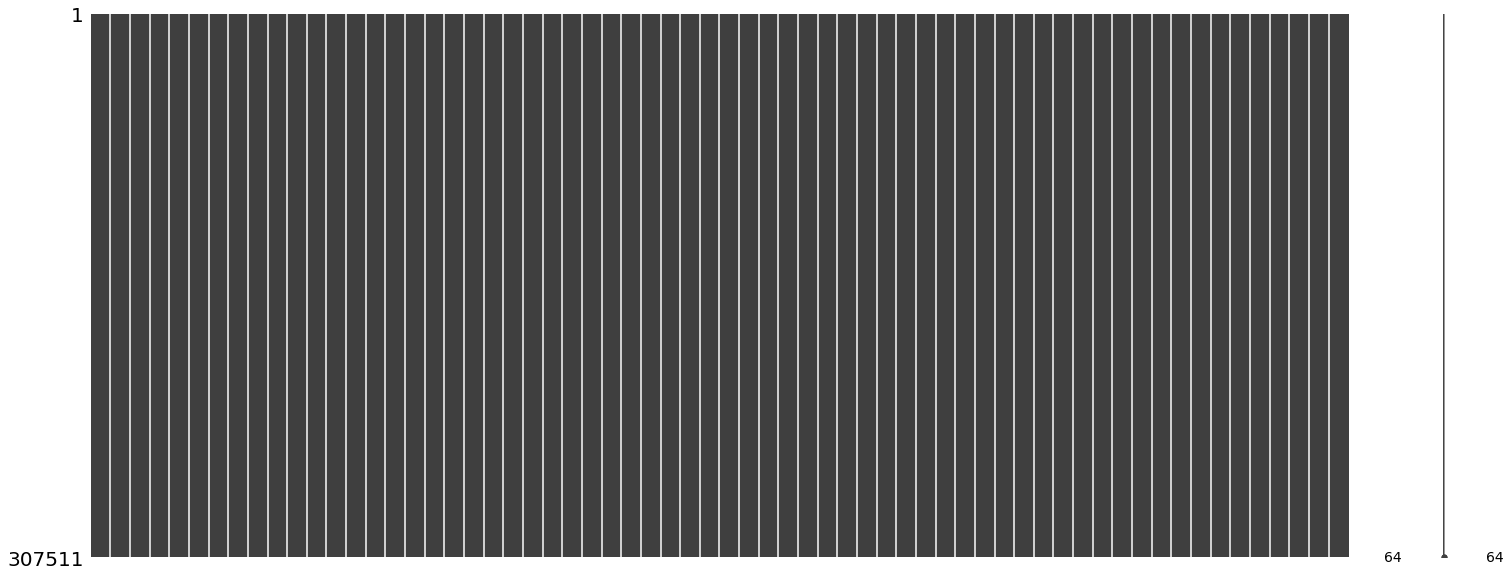

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(X_filled)

plt.show()

In [10]:
# カテゴリ変数

#object_columns = X_filled.select_dtypes(include="object").columns
categorical_features = X_filled.select_dtypes(include="object")

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
categorical_features_encoded = ordinal_encoder.fit_transform(categorical_features)
categorical_features_encoded_df = pd.DataFrame(data=categorical_features_encoded, index=categorical_features.index, columns=categorical_features.columns)
X_filled.update(categorical_features_encoded_df)

## 1-2. 交差検証

In [12]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold


auc_scores = []
logloss_scores = []
kf = KFold(n_splits=3, shuffle=True, random_state=1)

for tr_idx, va_idx in kf.split(X_filled):
    print("TRAIN:", tr_idx, "TEST:", va_idx)
    tr_x, va_x = X_filled.iloc[tr_idx], X_filled.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

    tr_x = tr_x.values
    va_x = va_x.values
    tr_y = tr_y.values.ravel()
    va_y = va_y.values.ravel()
    
    lgb_train = lgb.Dataset(
                                        tr_x, tr_y, 
                                        feature_name=list(X_filled.columns)
                                       )
    lgb_eval = lgb.Dataset(
                                       va_x, va_y, 
                                       reference=lgb_train,
                                      )

    params = {
                    'objective' : 'binary'
                    }


    lgbm_model = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                                        verbose_eval=10, 
                                        num_boost_round=1000, 
                                        early_stopping_rounds=10,
                                       )
    

    va_pred = lgbm_model.predict(va_x, num_iteration=lgbm_model.best_iteration)
    
    auc_score = roc_auc_score(va_y, va_pred)
    auc_scores.append(auc_score)
    print(f'roc_auc_score : {auc_score : .4f} ')
    
    logloss_score = log_loss(va_y, va_pred)
    logloss_scores.append(logloss_score)
    
    print("------------------------------------------------")
    
print(f'logloss: {np.mean( logloss_scores) : .4f} ')
print(f'roc_auc_score (mean) : {np.mean(auc_scores) : .4f} ')

TRAIN: [     0      2      5 ... 307508 307509 307510] TEST: [     1      3      4 ... 307499 307501 307503]
[LightGBM] [Info] Number of positive: 16548, number of negative: 188459
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3075
[LightGBM] [Info] Number of data points in the train set: 205007, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080719 -> initscore=-2.432615
[LightGBM] [Info] Start training from score -2.432615
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.263861
[20]	valid_0's binary_logloss: 0.259657
[30]	valid_0's binary_logloss: 0.257895
[40]	valid_0's binary_logloss: 0.257014
[50]	valid_0's binary_logloss: 0.256452
[60]	valid_0's binary_logloss: 0.256204
[70]	valid_0's binary_loglo

# 【問題2】グリッドサーチ

In [13]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [14]:
params = {
                 'n_estimators' : [50, 100, 200],
                 'learning_rate':[0.01, 0.05, 0.1],
                 }

lgbm_grid = GridSearchCV(
                                          estimator=LGBMClassifier(), 
                                          param_grid=params,
                                          cv=3,
                                          scoring='roc_auc',
                                          refit=True,
                                          #random_state=314,
                                          verbose=True,
                                          )

In [15]:
lgbm_grid.fit(X_filled.values, y.values.ravel())

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.3min finished


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=True)

In [16]:
print(lgbm_grid.best_score_)
print(lgbm_grid.best_params_)

0.715483524789085
{'learning_rate': 0.05, 'n_estimators': 200}


In [17]:
auc_scores1 = []
logloss_scores1 = []
kf = KFold(n_splits=4, shuffle=True, random_state=1)

for tr_idx, va_idx in kf.split(X_filled):
    print("TRAIN:", tr_idx, "TEST:", va_idx)
    tr_x, va_x = X_filled.iloc[tr_idx], X_filled.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

    tr_x = tr_x.values
    va_x = va_x.values
    tr_y = tr_y.values.ravel()
    va_y = va_y.values.ravel()
    
    
    #lgb_train = lgb.Dataset(
    #                                    tr_x, tr_y, 
    #                                   feature_name=list(X_filled.columns),
    #                                    )
    #lgb_eval = lgb.Dataset(
    #                                   va_x, va_y, 
    #                                   reference=lgb_train,
    #                                   )

    model = lgb.LGBMClassifier(
                                               random_state=314, 
                                               learning_rate = 0.05, 
                                               n_estimators = 200,
                                               )

    model.fit(tr_x, tr_y)
    
    va_pred = model.predict_proba(va_x)
    
    auc_score = roc_auc_score(va_y, va_pred[:, 1])
    auc_scores1.append(auc_score)
    print(f'roc_auc_score : {auc_score : .4f} ')
    
    logloss_score = log_loss(va_y, va_pred)
    logloss_scores1.append(logloss_score)
    print(f'logloss : {logloss_score : .4f} ')
    
    print("------------------------------------------------")
    
print(f'roc_auc_score (mean) : {np.mean(auc_scores1) : .4f} ')
print(f'logloss(mean) : {np.mean( logloss_scores1) : .4f} ')

TRAIN: [     0      2      3 ... 307508 307509 307510] TEST: [     1      4      6 ... 307493 307495 307501]
roc_auc_score :  0.7252 
logloss :  0.2562 
------------------------------------------------
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     3     18     21 ... 307502 307503 307504]
roc_auc_score :  0.7170 
logloss :  0.2549 
------------------------------------------------
TRAIN: [     0      1      2 ... 307507 307508 307509] TEST: [     9     10     12 ... 307492 307500 307510]
roc_auc_score :  0.7216 
logloss :  0.2570 
------------------------------------------------
TRAIN: [     1      3      4 ... 307503 307504 307510] TEST: [     0      2      5 ... 307507 307508 307509]
roc_auc_score :  0.7219 
logloss :  0.2544 
------------------------------------------------
roc_auc_score (mean) :  0.7214 
logloss(mean) :  0.2556 


# 【問題3】Kaggle Notebooksからの調査

* ランダムサーチ<br>
https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

* ベイズ最適化<br>
https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

* 特徴エンジニアリングの種々のアプローチ<br>
https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering

# 【問題4】高い汎化性能のモデル作成

## ランダムサーチ

In [18]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={
                     'num_leaves': sp_randint(6, 50), 
                     'min_child_samples': sp_randint(100, 500), 
                     'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                     'subsample': sp_uniform(loc=0.2, scale=0.8), 
                     'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                     'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                     'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
                     }

In [19]:
from sklearn.model_selection import RandomizedSearchCV

model2 = lgb.LGBMClassifier(
                                           max_depth=-1, 
                                           random_state=314, 
                                           silent=True, 
                                           metric='None', 
                                           n_jobs=4, 
                                           n_estimators=200, 
                                           learning_rate = 0.05, 
                                           )

lgbm_rands = RandomizedSearchCV(
                                                         estimator=model2, 
                                                         param_distributions=param_test, 
                                                         scoring='roc_auc',
                                                         cv=3,
                                                         refit=True,
                                                         random_state=314,
                                                         verbose=True
                                                         )

In [20]:
lgbm_rands.fit(X_filled.values, y.values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(learning_rate=0.05, metric='None',
                                            n_estimators=200, n_jobs=4,
                                            random_state=314),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17c460310>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a46301f0>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a4630eb0>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10

In [21]:
print(lgbm_rands.best_score_)
print(lgbm_rands.best_params_)

0.7209006010244661
{'colsample_bytree': 0.404828563763895, 'min_child_samples': 350, 'min_child_weight': 0.001, 'num_leaves': 36, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.9274016358891894}


In [22]:
auc_scores2 = []
logloss_scores2 = []
kf = KFold(n_splits=4, shuffle=True, random_state=1)

for tr_idx, va_idx in kf.split(X_filled):
    print("TRAIN:", tr_idx, "TEST:", va_idx)
    tr_x, va_x = X_filled.iloc[tr_idx], X_filled.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]

    tr_x = tr_x.values
    va_x = va_x.values
    tr_y = tr_y.values.ravel()
    va_y = va_y.values.ravel()

    model2 = lgb.LGBMClassifier(
                                               max_depth=-1, 
                                               random_state=314, 
                                               silent=True, 
                                               metric='None', 
                                               n_jobs=4, 
                                               n_estimators=200, 
                                               learning_rate = 0.05, 
                                               colsample_bytree=0.404828563763895, 
                                               min_child_samples=350,
                                               min_child_weight=0.001,
                                               num_leaves=36, 
                                               reg_alpha = 1,
                                               reg_lambda = 5,
                                               subsample = 0.9274016358891894,
                                               )
    
    model2.fit(tr_x, tr_y)

    va_pred = model2.predict_proba(va_x)
    
    auc_score = roc_auc_score(va_y, va_pred[:, 1])
    auc_scores2.append(auc_score)
    print(f'roc_auc_score : {auc_score : .4f} ')
    
    logloss_score = log_loss(va_y, va_pred)
    logloss_scores2.append(logloss_score)
    print(f'logloss : {logloss_score : .4f} ')
    
    print("------------------------------------------------")
    
print(f'roc_auc_score (mean) : {np.mean(auc_scores2) : .4f} ')
print(f'logloss(mean) : {np.mean( logloss_scores2) : .4f} ')


TRAIN: [     0      2      3 ... 307508 307509 307510] TEST: [     1      4      6 ... 307493 307495 307501]
roc_auc_score :  0.7265 
logloss :  0.2558 
------------------------------------------------
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [     3     18     21 ... 307502 307503 307504]
roc_auc_score :  0.7184 
logloss :  0.2544 
------------------------------------------------
TRAIN: [     0      1      2 ... 307507 307508 307509] TEST: [     9     10     12 ... 307492 307500 307510]
roc_auc_score :  0.7234 
logloss :  0.2566 
------------------------------------------------
TRAIN: [     1      3      4 ... 307503 307504 307510] TEST: [     0      2      5 ... 307507 307508 307509]
roc_auc_score :  0.7229 
logloss :  0.2543 
------------------------------------------------
roc_auc_score (mean) :  0.7228 
logloss(mean) :  0.2553 


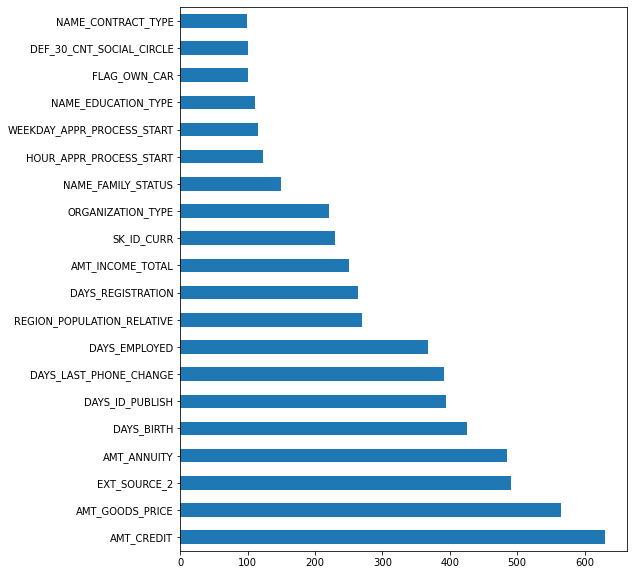

In [23]:
# Feature Importance

feat_imp = pd.Series(model2.feature_importances_, index=X_filled.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

## 図表

In [24]:
eval_dict_index = ["Logloss", "RUC_AUC"]
eval_dict = {
                   "LGBM" : [np.mean( logloss_scores), np.mean(auc_scores)],
                   "LGBM with GridSearch" : [np.mean( logloss_scores1), np.mean(auc_scores1)],
                   "LGBM with RandomSearch" : [np.mean( logloss_scores2), np.mean(auc_scores2)],
                   }

df = pd.DataFrame(eval_dict, index=eval_dict_index)

In [25]:
df

,LGBM,LGBM with GridSearch,LGBM with RandomSearch
Logloss,0.256325,0.255631,0.255272
RUC_AUC,0.718683,0.721410,0.722802


# 【問題5】最終的なモデルの選定

In [26]:
# テストデータ処理

In [27]:
test_dropped = test.drop(na_index, axis=1)
test_dropped.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
test_filled = test_dropped.fillna(method = "ffill")
test_filled.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


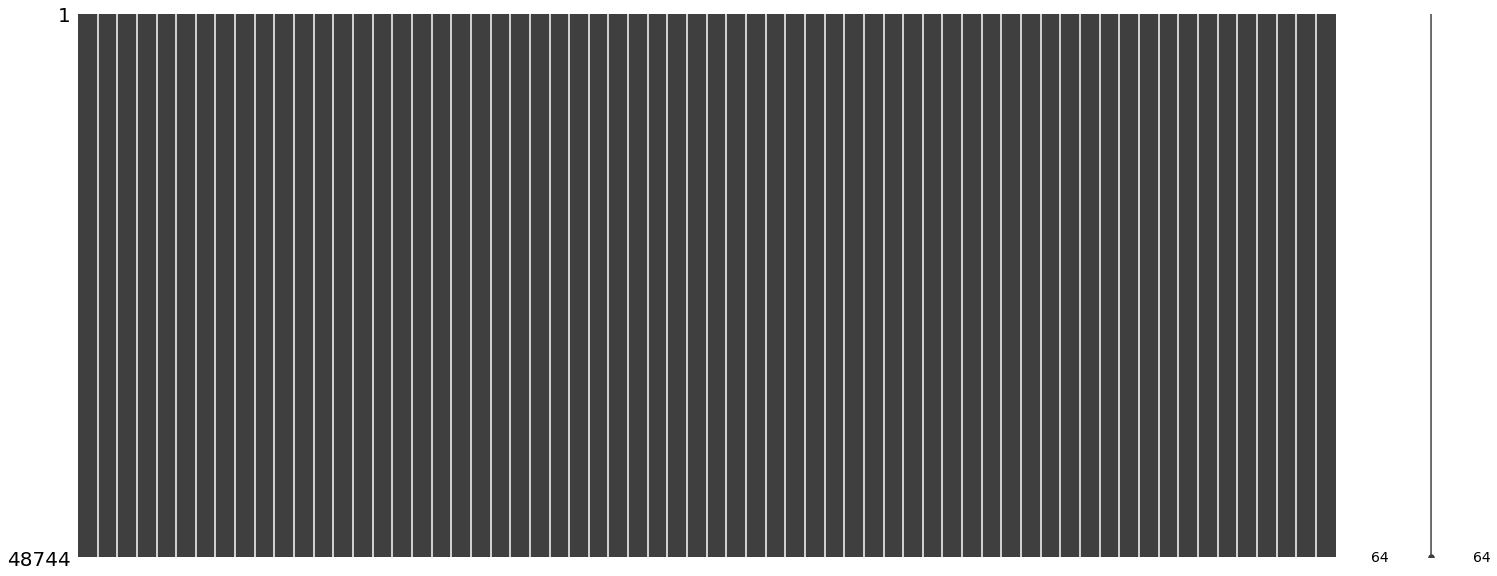

In [29]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(test_filled)

plt.show()

In [30]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = test_filled.select_dtypes(include="object")
ordinal_encoder = OrdinalEncoder()
categorical_features_encoded = ordinal_encoder.fit_transform(categorical_features)
categorical_features_encoded_df = pd.DataFrame(data=categorical_features_encoded, index=categorical_features.index, columns=categorical_features.columns)
test_filled.update(categorical_features_encoded_df)
test_filled.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
final_model = model2.fit(tr_x, tr_y)
y_pred = final_model.predict_proba(test_filled.values)

In [32]:
submission = pd.read_csv('home-credit-default-risk/sample_submission.csv')
submission['SK_ID_CURR'] = test_filled['SK_ID_CURR']
submission['TARGET'] = y_pred[:, 1]
submission.to_csv('home-credit-default-risk/submission.csv', index=False)

In [33]:
pd.read_csv("home-credit-default-risk/submission.csv")

,SK_ID_CURR,TARGET
0,100001,0.030101
1,100005,0.110269
2,100013,0.021251
3,100028,0.064628
4,100038,0.121818
...,...,...
48739,456221,0.042894
48740,456222,0.077424
48741,456223,0.054664
48742,456224,0.103830


* Leaderboard のスコアは 0.69673
* ランダムサーチでハイパーパラメータ調整を行なった結果、グリッドサーチよりスコアが僅かに良くなったのでその値を使用した。

In [34]:
df

,LGBM,LGBM with GridSearch,LGBM with RandomSearch
Logloss,0.256325,0.255631,0.255272
RUC_AUC,0.718683,0.721410,0.722802
